### Ranking System in Rainbow Six: Siege

[Matchmaking Rating and Ranks](https://rainbow6.ubisoft.com/siege/en-us/news/152-277344-16/matchmaking-rating-and-ranks "Ubisoft - Matchmaking Rating and Ranks")

#### Progression

R6 players earn experience points (`xp`) for various in-game actions. Killing enemies, rescuing friendlies, setting up defenses, providing intelligence to others on his/her team, etc.

Earning `xp` allows players to reach higher "Clearance Levels" (`levels`) which grant you access to more in-game content. For example, the Ranked game mode is not available to players below Clearance Level 20. Since Clearance Level is publicly displayed to other players in-game, achieving a high Clearance Level can be a type of status symbol. 

* **xp**: total experience points earned
* **level**: a high-level approximation of a player's skill

#### Game Mode Stats

Game Mode Stats describe how successful a player is in a particular game mode (casual/ranked).

* **playtime**: minutes of playtime in a given game mode
* **kd**: Kill/Death ratio equals the number of kills the player has scored life-to-date divided by the number of deaths suffered
* **kills**: number of times a player has killed an enemy
* **deaths**: number of times a player was killed by enemies, suicide, or friendly-fire
* **wins**: number of games won
* **losses**: number of games lost
* **wlr**: ratio of wins to losses
* **has_played**: True/False indicating whether a player has ever played a particular game mode (casual/ranked)

#### Gameplay Stats

Gameplay stats give us a robust portrait of a player's play style (e.g. passive/defensive vs. aggressive/offensive). These can be useful in discovering archetypical profiles of how players play the game.

These track various in-actions taken by each player such as movement frequency, weapon or gear use, or supportive actions taken such as setting up defenses to protect an objective or help teammates. 

* **assists**: an assist occurs when a player does damage to an opponent who is later killed by a teammate
* **barricades_built**: barricades are obstacles placed in doorways and windows to deny the enemy lines-of-sight and slow the approach of enemy players
* **bullets_fired**: number of bullets fired
* **bullets_hit**: number of bullets that hit an enemy player
* **headshots**: number of bullets that hit an enemy player above the neck. In Rainbow Six, headshots result in an immediate kill regardless of the weapon used.
* **melee_kills**: number of close-range kills using a knife attack rather than a player's primary or secondary weapon
* **penetration_kills**: number of kills resulting from gunfire through walls or other obstacles
* **reinforcements_deployed**: on defense, each player receives 2 bulletproof reinforcements which can be placed on walls. this measure describes the number of such reinforcements a player has used.
* **revives**: number of times a player has rescued a "downed" or wounded comrade.
* **steps_moved**: number of steps taken in-game
* **suicides**: number of times a player has accidentally killed him/herself


#### Calculated Measures

We'll also calculate some additional measures that are useful for analysing gameplay data.

* **accuracy**: ratio of bullets that hit a target / total bullets fired across both game modes combined
* **total playtime**: sum of playtime for both game modes in seconds
* **xp per minute**: xp earned / global playtime
* **rounds played**: sum of wins and losses for both game modes combined (i.e. ranked wins + ranked losses + casual wins + casual losses)
* **support actions**: total number of support actions taken for each game mode
* **dpm**: deaths per minute of playtime
* **kpm**: kills per minute of playtime

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[Game Analytics](https://books.google.com/books?id=-guHadEPrFcC&lpg=PA227&ots=lUgpjhl2LI&dq=normalize%20player%20stats%20for%20minutes%20playtime&pg=PA227#v=onepage&q=normalize%20player%20stats%20for%20minutes%20playtime&f=false)

Game Analytics: Maximizing the Value of Player Data
edited by Magy Seif El-Nasr, Anders Drachen, Alessandro Canossa

[what is game telemetry](http://www.gameanalytics.com/blog/what-is-game-telemetry.html)

In [2]:
sys.path.append("../radarchart/")
from radarchart import Radar

In [3]:
sys.path.append("../utils/")
from utils import r6io, sample_nrows, features

In [60]:
pd.options.display.float_format = '{:.4f}'.format

In [45]:
df = r6io.read_player_csv('../data/leaderboard-pages.csv', 'ps4', **{"nrows": 10000})
df = df.reset_index()
NUMBERS = df.columns[(df.columns.str.startswith('stats.')) & (df.columns.str.endswith('has_played')==False)]

In [46]:
df.dtypes

index                                             int64
updated_at                               datetime64[ns]
platform                                         object
ubisoft_id                                       object
username                                         object
stats.ranked.has_played                            bool
stats.casual.has_played                            bool
stats.casual.deaths                             float64
stats.casual.kd                                 float64
stats.casual.kills                              float64
stats.casual.losses                             float64
stats.casual.playtime                           float64
stats.casual.wins                               float64
stats.casual.wlr                                float64
stats.overall.assists                           float64
stats.overall.barricades_built                  float64
stats.overall.bullets_fired                     float64
stats.overall.bullets_hit                       

In [47]:
# radar = RadarChart(plt.figure(figsize=(6, 6)), ['A','B','C','D', 'E'])
# radar.plot([1, 3, 2, 5, 4],  "-", lw=2, color="b", alpha=0.4, label="first")
# radar.plot([2.3, 2, 3, 3, 2],"-", lw=2, color="r", alpha=0.4, label="second")
# radar.plot([3, 4, 3, 4, 2], "-", lw=2, color="g", alpha=0.4, label="third")
# radar.show()

In [61]:
df.head(1).T

,0
index,9346
updated_at,2017-03-30 15:38:51.639000
platform,ps4
ubisoft_id,403c41b5-b184-4a96-b89e-cd4f9c571fb0
username,A-antoni98
stats.ranked.has_played,True
stats.casual.has_played,True
stats.casual.deaths,777.0000
stats.casual.kd,1.4860
stats.casual.kills,1155.0000


* **playtime**: minutes of playtime in a given game mode
* **kd**: Kill/Death ratio equals the number of kills the player has scored life-to-date divided by the number of deaths suffered
* **kills**: number of times a player has killed an enemy
* **deaths**: number of times a player was killed by enemies, suicide, or friendly-fire
* **wins**: number of games won
* **losses**: number of games lost
* **wlr**: ratio of wins to losses

In [80]:
def get_row_values_as_list(row, columns):
    return sum([val for val in row.ix[columns].values.tolist()], [])

In [81]:
def prep_row_data_for_radar_plot(row, colnames):
    row = row.copy()
    row = pd.DataFrame(row).T
    return row.ix[colnames]

In [78]:
stats = [
    'stats.casual.kpm', 
    'stats.casual.dpm', 
    'stats.casual.wpm', 
    'stats.casual.lpm', 
    'stats.ranked.kpm', 
    'stats.ranked.dpm', 
    'stats.ranked.wpm', 
    'stats.ranked.lpm'
]
prep_row_data_for_radar_plot(df.head(1), stats)

,0
stats.casual.kpm,0.0040
stats.casual.dpm,0.0027
stats.casual.wpm,0.0008
stats.casual.lpm,0.0005
stats.ranked.kpm,0.0048
stats.ranked.dpm,0.0029
stats.ranked.wpm,0.0005
stats.ranked.lpm,0.0003


In [82]:
row = pd.DataFrame(df.ix[0])
values = get_row_values_as_list(row, stats)

In [83]:
print stats
print values

['stats.casual.kpm', 'stats.casual.dpm', 'stats.casual.wpm', 'stats.casual.lpm', 'stats.ranked.kpm', 'stats.ranked.dpm', 'stats.ranked.wpm', 'stats.ranked.lpm']
[0.00396630529218449, 0.0026682417420150206, 0.00075892075287685911, 0.00045672606394851702, 0.0047981157160141138, 0.0029027910036480403, 0.00051523390239077726, 0.00034502270249382408]


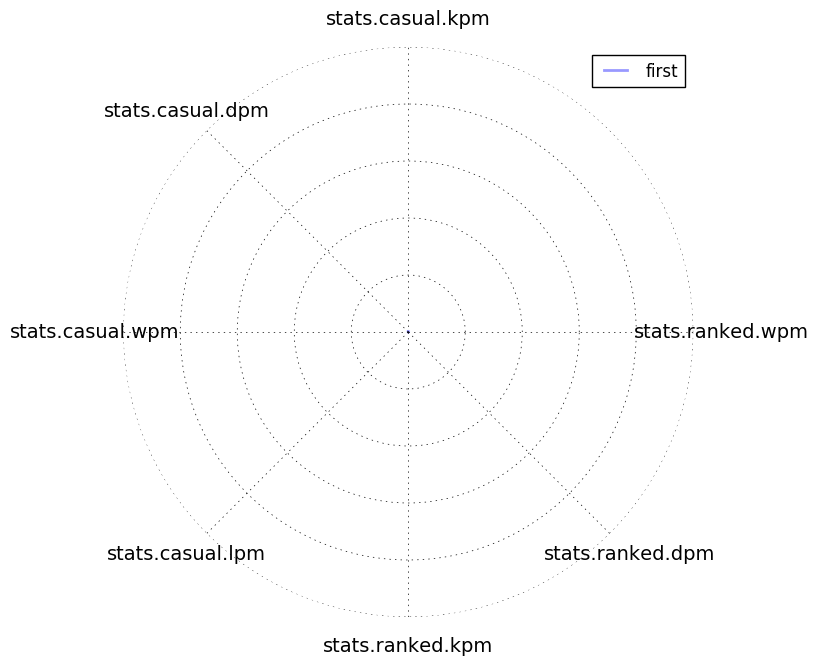

In [84]:
radar = RadarChart(plt.figure(figsize=(6, 6)), stats)
radar.plot(values,  "-", lw=2, color="b", alpha=0.4, label="first")
radar.show()